Import Libs

In [355]:
import pandas as pd
import os
import datetime as dt
import matplotlib.pyplot as plt

concat all files in one dataset file

In [359]:
df = pd.concat([pd.read_csv(os.path.join('data',file)) for file in os.listdir('./data')])
df.to_csv('data/all_data.csv',index=False)

Load the final Dataset

In [395]:
df = pd.read_csv('data/all_data.csv')

In [396]:
df.shape

(186850, 6)

In [397]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [402]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019.0,4.0
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019.0,4.0
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019.0,4.0
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019.0,4.0
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019.0,4.0


<b>Q_1: What was the best month for sales? How much was earned that month?<b>

In [403]:
#clean the null values 
df = df.dropna(how = 'all')
df[df['Order Date'].isna()].shape

(355, 8)

In [404]:
#Making Sure that Quantity Ordered column is clean before dealing with it
df =df.drop(df[df['Quantity Ordered'].str[0:2]=='Qu'].index)
temp = df[df['Quantity Ordered'].str[0:2]=='Qu']
temp

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month


Extracting year and month Columns from Order Date Column

In [405]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9


In [406]:
# More Cleaning to data (converting datatypes)
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')
df['Price Each'] = df['Price Each'].astype('float')
df['year'] = df['year'].astype('int')
df['month'] = df['month'].astype('int')

df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
year                         int32
month                        int32
dtype: object

Creating Order total column as the product of Quantity Ordered and Price Each columns

In [407]:
df['order_total'] = df['Quantity Ordered'] * df['Price Each']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,order_total
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,11.99
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,700.00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,379.99


Now we able to find the total sales of each month

In [408]:
months_sales = df.groupby("month").sum()
months_sales

,Quantity Ordered,Price Each,year,order_total
month,,,,
1,10903,1811768.38,19602505,1822256.73
2,13449,2188884.72,24177525,2202022.42
3,17005,2791207.83,30593907,2807100.38
4,20558,3367671.02,36905301,3390670.24
5,18667,3135125.13,33446754,3152606.75
6,15253,2562025.61,27365526,2577802.26
7,16072,2632539.56,28857567,2647775.76
8,13448,2230345.42,24149259,2244467.88
9,13109,2084992.09,23462799,2097560.13


Some Visulisation

([<matplotlib.patches.Wedge at 0x1383b347940>,
 [Text(1.084883661992771, 0.1817345315044856, '1'),
  Text(0.947687744563884, 0.558469281879871, '2'),
  Text(0.6047064671239659, 0.9188743595391332, '3'),
  Text(0.019294595644941136, 1.0998307681543094, '4'),
  Text(-0.6013820864976231, 0.9210535196392039, '5'),
  Text(-0.98051084366423, 0.49859651568864777, '6'),
  Text(-1.099983214310839, -0.006076860570627514, '7'),
  Text(-0.9899561776434797, -0.4795693550942466, '8'),
  Text(-0.728789191081269, -0.823933440857397, '9'),
  Text(-0.21077102654469893, -1.079618253999669, '10'),
  Text(0.4675083228160316, -0.9957087767503817, '11'),
  Text(1.0043077923759214, -0.44873807301476376, '12')])

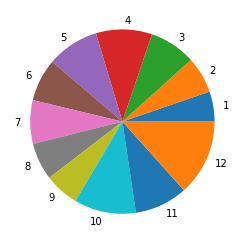

In [409]:
plt.pie(months_sales['order_total'],labels=months_sales.index)

We notice that December has the most total sales, maybe due to holidays

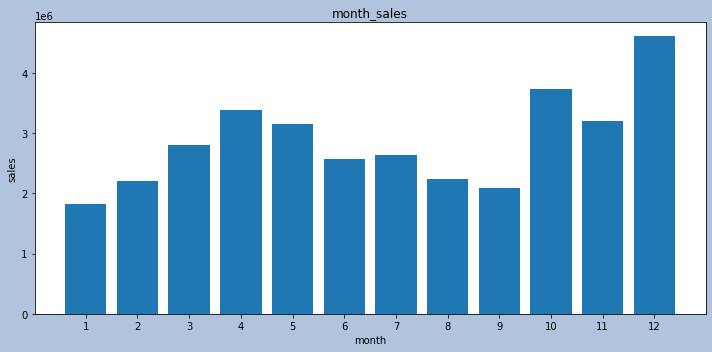

In [410]:
# plt.bar(months_sales.index,months_sales['order_total'])
# plt.xticks
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(months_sales.index,months_sales['order_total'])
ax.set_xlabel('month')
ax.set_ylabel('sales')
ax.set_title('month_sales')
ax.set_xticks(months_sales.index)
fig.set_facecolor('lightsteelblue')

<b>Q_1: What was the city with most sales? How much was earned?<b>

In [411]:
df['Purchase Address'] = df['Purchase Address'].astype(str)
# df['city'] = df['Purchase Address'].str.split(',').str[1]
def get_city(address):
    x = address.split(',')
    return f"{x[1]} ({x[2].strip()[0:2]})"
df['city'] = df['Purchase Address'].apply(lambda x :get_city(x) )
df['city']
# df.dtypes

0                 Dallas (TX)
2                 Boston (MA)
3            Los Angeles (CA)
4            Los Angeles (CA)
5            Los Angeles (CA)
                 ...         
186845       Los Angeles (CA)
186846     San Francisco (CA)
186847     San Francisco (CA)
186848     San Francisco (CA)
186849     San Francisco (CA)
Name: city, Length: 185950, dtype: object

In [412]:
city_sales = df.groupby("city").sum()
city_sales

,Quantity Ordered,Price Each,year,month,order_total
city,,,,,
Atlanta (GA),16602,2779908.20,30044739,104794,2795498.58
Austin (TX),11153,1809873.61,19998197,69829,1819581.75
Boston (MA),22528,3637409.77,40246750,141112,3661642.01
Dallas (TX),16730,2752627.82,29921582,104620,2767975.40
Los Angeles (CA),33289,5421435.23,59772496,208325,5452570.80
New York City (NY),27932,4635370.83,50224654,175741,4664317.43
Portland (ME),2750,447189.25,4956645,17144,449758.27
Portland (OR),11303,1860558.22,20210192,70621,1870732.34
San Francisco (CA),50239,8211461.74,90313920,315520,8262203.91


San Francisco has the most sales

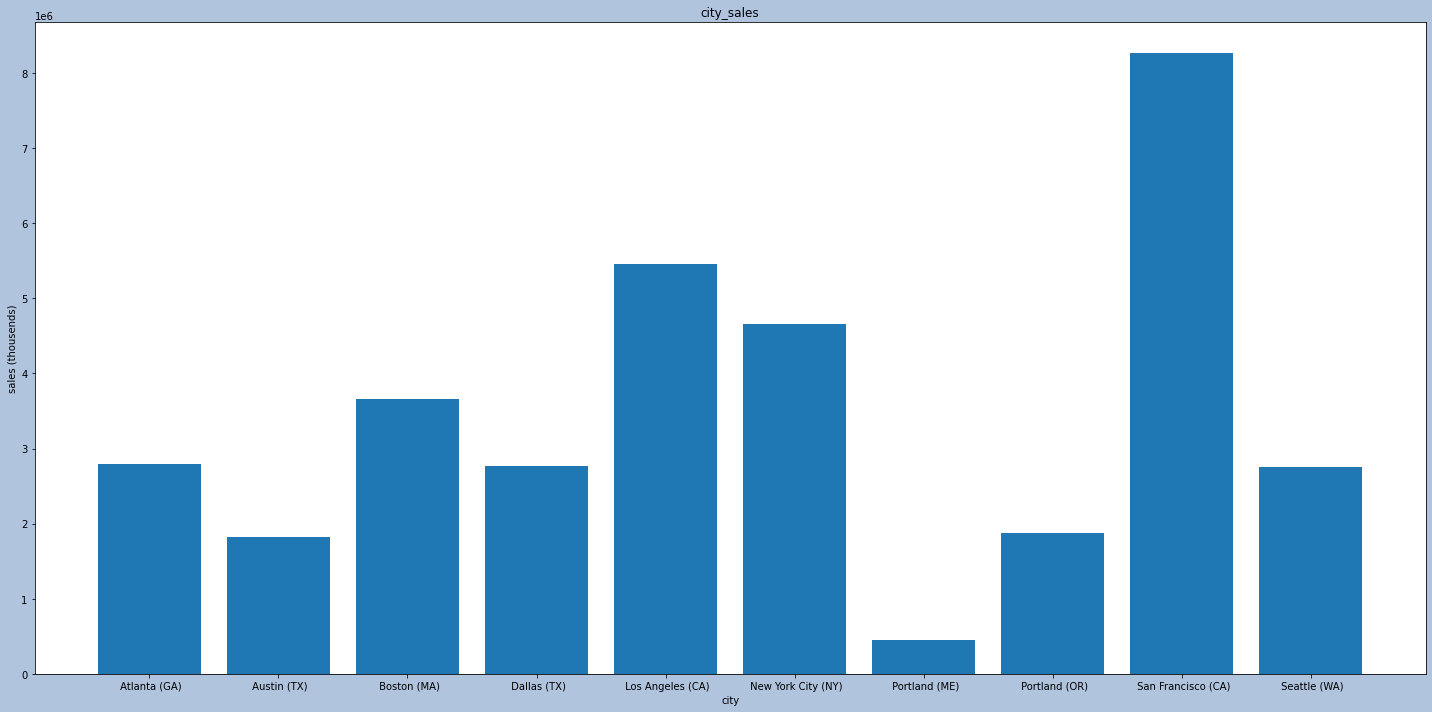

In [413]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(city_sales.index,city_sales['order_total'])
ax.set_xlabel('city')
ax.set_ylabel('sales (thousends)')
ax.set_title('city_sales')
fig.set_facecolor('lightsteelblue')

<b> Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?</b>

First we need to extract time from date column

In [414]:
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df['Count'] = 1
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,order_total,city,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,11.99,Los Angeles (CA),9,27,1


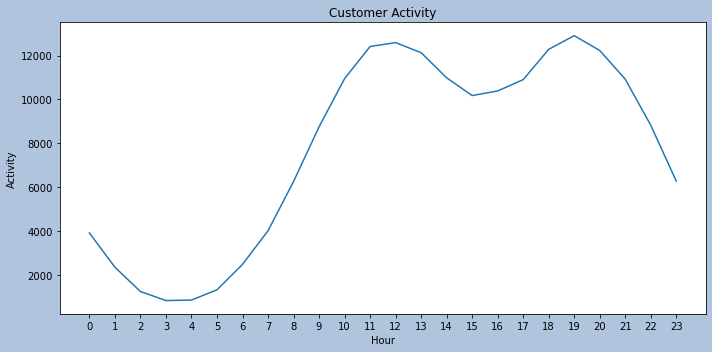

In [415]:
keys = [pair for pair, df in df.groupby(['Hour'])]
hour_activity = df.groupby(['Hour']).count()['Count'] # how many customers buyes at each hour
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(keys, hour_activity)
ax.set_xlabel('Hour')
ax.set_ylabel('Activity')
ax.set_title('Customer Activity')
ax.set_xticks(keys)
fig.set_facecolor('lightsteelblue')


So I Recommend displaying ads before 11 am and 7 pm

<b>Question 4: What products are most often sold together?</b>

In [416]:
df[df['Order ID'].duplicated()]['Order ID'].value_counts()

160873    4
235798    3
178158    3
295681    3
196615    3
         ..
158357    1
158348    1
158342    1
158337    1
259350    1
Name: Order ID, Length: 7136, dtype: int64

In [417]:
# x = df[df['Order ID'].duplicated(keep=False)]
# x['Grouped_items'] = x.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# df =x[['Order ID', 'Grouped_items']].drop_duplicates()
x = df[df['Order ID'].duplicated(keep=False)]

x['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
y = x[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\salem\AppData\Local\Temp\ipykernel_12848\695037101.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [419]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in y['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


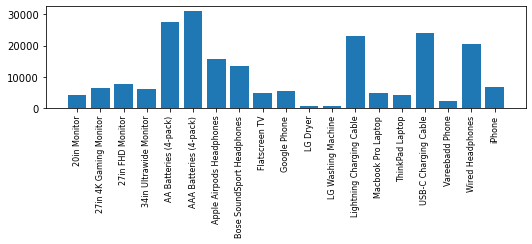

In [420]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()